# 1.Data Understanding

## 1a) Loading Necessary Libraries

In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')

## 1b) Loading the data

In [61]:
original_data=pd.read_csv('C:/Users/dell/Desktop/EDA_DataSets/archive/ITSalarySurveyEU2020.csv')
df=pd.read_csv('C:/Users/dell/Desktop/EDA_DataSets/archive/ITSalarySurveyEU2020.csv')

In [62]:
# viewing the data
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [64]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
df.shape

(1253, 23)

In [65]:
print("IT Salary Survey dataset  has {0} columns and {1} rows".format(df.shape[0],df.shape[1]));

IT Salary Survey dataset  has 1253 columns and 23 rows


In [66]:
#Printing all the columns present in data
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

## Renaming some columns
##### (Since the column names were too lengthy to proceed with)

In [68]:
df.rename(columns = {'Total years of experience': 'Years_of_experience',
                       'Years of experience in Germany':'Years_of_experience_Germany','Seniority level':'Seniority_level',
                       'Your main technology / programming language': 'Main_technology',
                     'Position': 'Position',
                      'Other technologies/programming languages you use often': 'Other_technologies',
                      'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly_salary',
                     'Yearly bonus + stocks in EUR':'Yearly_bonus_and_stocks', 'Employment status':'Employment_status',
                     'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'Annual_salary_year_ago',
                     'Annual bonus+stocks one year ago. Only answer if staying in same country':'Annual_bonus_and_stocks',
                       'Сontract duration':'Сontract_duration','Company size':'Company_size','Company type':'Company_type',
                       'Have you lost your job due to the coronavirus outbreak?':'job_lost_during_covid',
                       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week':'shorter_working_week_hrs',
                      'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR':'additional_monetary_support', 
                      'Number of vacation days': 'Vacation_Days','Main language at work': 'Language_at_work',
                      }, inplace = True)

In [69]:
# looking at the columns again (after renaming)

df.head()

,Timestamp,Age,Gender,City,Position,Years_of_experience,Years_of_experience_Germany,Seniority_level,Main_technology,Other_technologies,...,Annual_bonus_and_stocks,Vacation_Days,Employment_status,Сontract_duration,Language_at_work,Company_size,Company_type,job_lost_during_covid,shorter_working_week_hrs,additional_monetary_support
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [70]:
# A closer look at the data types present in the data
df.dtypes

Timestamp                       object
Age                            float64
Gender                          object
City                            object
Position                        object
Years_of_experience             object
Years_of_experience_Germany     object
Seniority_level                 object
Main_technology                 object
Other_technologies              object
Yearly_salary                  float64
Yearly_bonus_and_stocks         object
Annual_salary_year_ago         float64
Annual_bonus_and_stocks         object
Vacation_Days                   object
Employment_status               object
Сontract_duration               object
Language_at_work                object
Company_size                    object
Company_type                    object
job_lost_during_covid           object
shorter_working_week_hrs       float64
additional_monetary_support     object
dtype: object

## 1c) Checking for Null Values

In [71]:
#checking null values
df.isnull().sum()

Timestamp                        0
Age                             27
Gender                          10
City                             0
Position                         6
Years_of_experience             16
Years_of_experience_Germany     32
Seniority_level                 12
Main_technology                127
Other_technologies             157
Yearly_salary                    0
Yearly_bonus_and_stocks        424
Annual_salary_year_ago         368
Annual_bonus_and_stocks        639
Vacation_Days                   68
Employment_status               17
Сontract_duration               29
Language_at_work                16
Company_size                    18
Company_type                    25
job_lost_during_covid           20
shorter_working_week_hrs       880
additional_monetary_support    791
dtype: int64

In [72]:
#null value in percentage
df.isnull().sum()/df.shape[0]*100

Timestamp                       0.000000
Age                             2.154828
Gender                          0.798085
City                            0.000000
Position                        0.478851
Years_of_experience             1.276935
Years_of_experience_Germany     2.553871
Seniority_level                 0.957702
Main_technology                10.135674
Other_technologies             12.529928
Yearly_salary                   0.000000
Yearly_bonus_and_stocks        33.838787
Annual_salary_year_ago         29.369513
Annual_bonus_and_stocks        50.997606
Vacation_Days                   5.426975
Employment_status               1.356744
Сontract_duration               2.314445
Language_at_work                1.276935
Company_size                    1.436552
Company_type                    1.995211
job_lost_during_covid           1.596169
shorter_working_week_hrs       70.231445
additional_monetary_support    63.128492
dtype: float64

## Plotting Histogram to check if the data is normally distributed(for numerical columns)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Yearly_salary'}>,
        <AxesSubplot:title={'center':'Annual_salary_year_ago'}>,
        <AxesSubplot:title={'center':'shorter_working_week_hrs'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

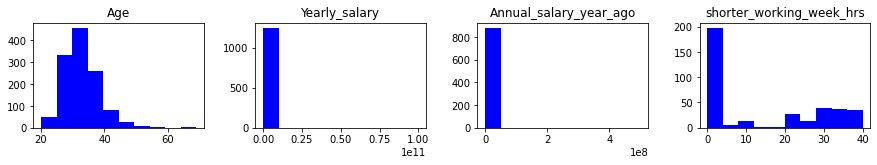

In [73]:
df.hist(layout=(5,4),color='blue',figsize=(15,12),grid=False)


### INFERENCE -
#### By looking at the garphs we can say that the data is not normally distributed for these columns.


In [74]:
#df['Age'].fillna(df['Age'].median()[0], inplace = True)
#df['Age'] = df['Age'].astype('int')

## 1d) Missing Value Treatment

### For Numerical Variables
#### We will use median to impute the missing values for the numerical columns since the data is not normally distributed.

In [75]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Yearly_salary']=df['Yearly_salary'].fillna(df['Yearly_salary'].median())
df['Annual_salary_year_ago']=df['Annual_salary_year_ago'].fillna(df['Annual_salary_year_ago'].median())
df['shorter_working_week_hrs']=df['shorter_working_week_hrs'].fillna(df['shorter_working_week_hrs'].median())

### For Categorical Variables

In [81]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode())
df['Years_of_experience']=df['Years_of_experience'].fillna(df['Years_of_experience'].mode())
df['Years_of_experience_Germany']=df['Years_of_experience_Germany'].fillna(df['Years_of_experience_Germany'].mode())
df['Seniority_level']=df['Seniority_level'].fillna(df['Seniority_level'].mode())
df['Main_technology']=df['Main_technology'].fillna(df['Main_technology'].mode())
df['Other_technologies']=df['Other_technologies'].fillna(df['Other_technologies'].mode())
df['Yearly_bonus_and_stocks']=df['Yearly_bonus_and_stocks'].fillna(df['Yearly_bonus_and_stocks'].mode())
df['Annual_salary_year_ago']=df['Annual_salary_year_ago'].fillna(df['Annual_salary_year_ago'].mode())
df['Annual_bonus_and_stocks']=df['Annual_bonus_and_stocks'].fillna(df['Annual_bonus_and_stocks'].mode())
df['Vacation_Days']=df['Vacation_Days'].fillna(df['Vacation_Days'].mode())
df['Employment_status']=df['Employment_status'].fillna(df['Employment_status'].mode())
df['Сontract_duration']=df['Сontract_duration'].fillna(df['Сontract_duration'].mode())
df['Language_at_work']=df['Language_at_work'].fillna(df['Language_at_work'].mode())
df['Language_at_work']=df['Language_at_work'].fillna(df['Language_at_work'].mode())
df['Company_size']=df['Company_size'].fillna(df['Company_size'].mode())
df['Company_type']=df['Company_type'].fillna(df['Company_type'].mode())
df['job_lost_during_covid']=df['job_lost_during_covid'].fillna(df['job_lost_during_covid'].mode())
df['shorter_working_week_hrs']=df['shorter_working_week_hrs'].fillna(df['shorter_working_week_hrs'].mode())
df['additional_monetary_support']=df['additional_monetary_support'].fillna(df['additional_monetary_support'].mode())

In [83]:
df['Position']=df['Position'].fillna(df['Position'].mode())

KeyError: 'Position'

In [82]:
(df.isnull().sum()/df.shape[0])*100

Timestamp                       0.000000
Age                             0.000000
Gender                          0.798085
City                            0.000000
Position                        0.478851
Years_of_experience             1.276935
Years_of_experience_Germany     2.553871
Seniority_level                 0.957702
Main_technology                10.135674
Other_technologies             12.529928
Yearly_salary                   0.000000
Yearly_bonus_and_stocks        33.838787
Annual_salary_year_ago          0.000000
Annual_bonus_and_stocks        50.997606
Vacation_Days                   5.426975
Employment_status               1.356744
Сontract_duration               2.314445
Language_at_work                1.276935
Company_size                    1.436552
Company_type                    1.995211
job_lost_during_covid           1.596169
shorter_working_week_hrs        0.000000
additional_monetary_support    63.048683
dtype: float64